In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre, gamma
from scipy.interpolate import interp1d
from mpmath import *
mp.pretty = True
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


#plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \boldmath'

plt.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'

        
# Figure size
#mpl.rcParams['figure.figsize'] = 10, 6

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

GNew = 7484169213.942707 # 1 / (M_SM * eV)
hbar = 6.58e-16
ckm = 2.998e5

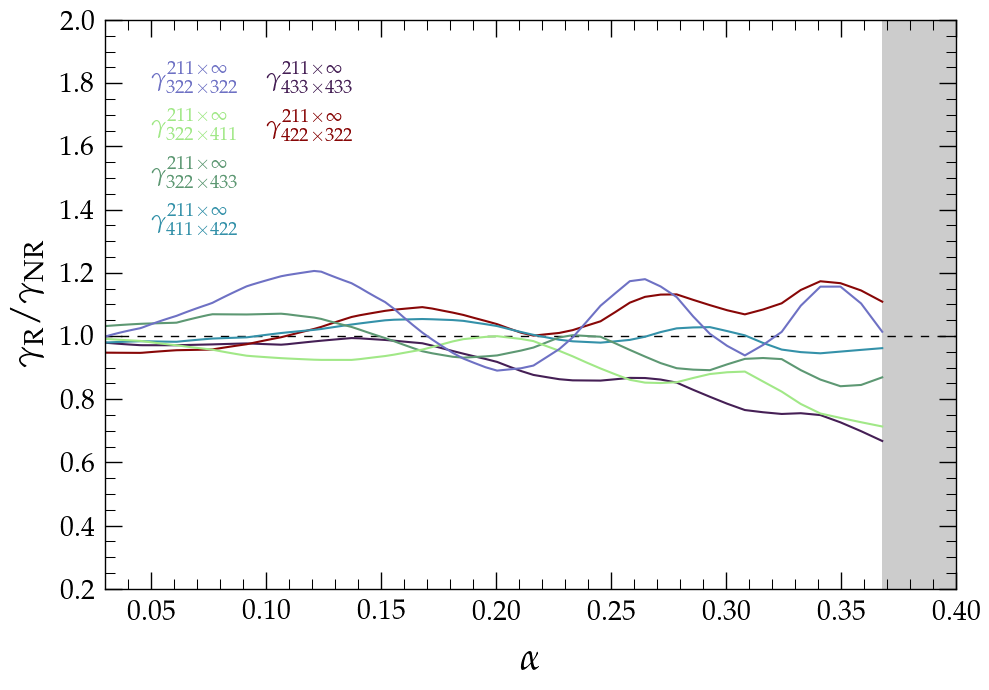

In [11]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
# apts = np.logspace(np.log10(0.03), np.log10(1), 100)
apts = np.logspace(np.log10(0.03), np.log10(0.368), 100)
plt.plot(np.array([0.0, 1.0]), np.array([1.0, 1.0]), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]

loadIn = np.loadtxt("433_433_211_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.2e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("422_322_211_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.64e-8 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)


loadIn = np.loadtxt("411_422_211_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)


loadIn = np.loadtxt("322_433_211_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.6e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)

loadIn = np.loadtxt("322_411_211_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.8e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4],lw=lw)



loadIn = np.loadtxt("322_322_211_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.15e-8 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)


refTop = 1.8
refDif = 0.15
plt.text(0.05, refTop, r"$\boldmath \gamma_{322\times 322}^{211 \times \infty}$", fontsize=18, color=colorL[5])
plt.text(0.05, refTop - (refDif), r"$\boldmath \gamma_{322\times 411}^{211 \times \infty}$", fontsize=18, color=colorL[4])
plt.text(0.05, refTop - (2*refDif), r"$\boldmath \gamma_{322\times 433}^{211 \times \infty}$", fontsize=18, color=colorL[3])
plt.text(0.05, refTop - (3*refDif), r"$\boldmath \gamma_{411 \times 422}^{211 \times \infty}$", fontsize=18, color=colorL[2])
plt.text(0.1, refTop - (refDif), r"$\boldmath \gamma_{422 \times 322}^{211 \times \infty}$", fontsize=18, color=colorL[1])
plt.text(0.1, refTop, r"$\boldmath \gamma_{433 \times 433}^{211 \times \infty}$", fontsize=18, color=colorL[0])



# plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
# plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

# plt.text( 0.32, 50, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=22)
# plt.text( 0.68, 5, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=22)

axs.axvspan(0.368, 2, facecolor="k", alpha=0.2)

#plt.xscale("log")
# plt.yscale("log")
plt.xlim([0.03, 0.4])
plt.ylim([0.2, 2])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_Inf_n4.pdf", dpi=200)

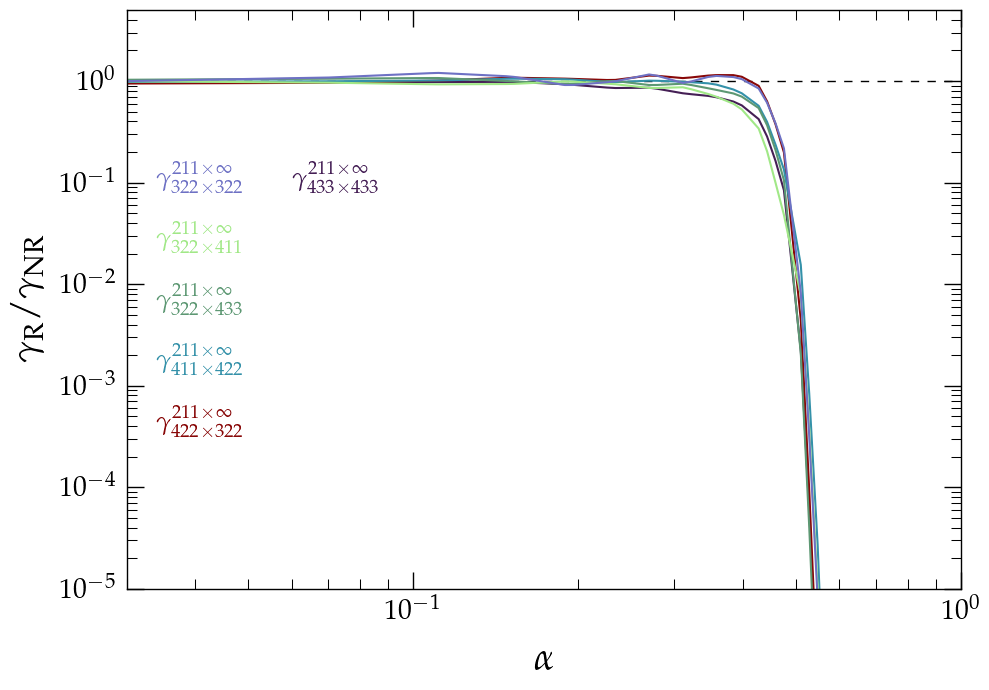

In [17]:
# ## 
# fig, axs = plt.subplots(1, figsize=(10,7))
# apts = np.logspace(np.log10(0.03), np.log10(1), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

# lw=1.5
# colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]

# loadIn = np.loadtxt("433_433_211_Inf_GF_v2_.dat")
# intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 9.2e-11 * apts**8
# newP = 10**intF(np.log10(apts))
# plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


# loadIn = np.loadtxt("422_322_211_Inf_GF_v2_.dat")
# intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 1.64e-8 * apts**8
# newP = 10**intF(np.log10(apts))
# plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)


# loadIn = np.loadtxt("411_422_211_Inf_GF_v2_.dat")
# intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 2.2e-9 * apts**8
# newP = 10**intF(np.log10(apts))
# plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)


# loadIn = np.loadtxt("322_433_211_Inf_GF_v2_.dat")
# intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 2.6e-9 * apts**8
# newP = 10**intF(np.log10(apts))
# plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)

# loadIn = np.loadtxt("322_411_211_Inf_GF_v2_.dat")
# intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 3.8e-9 * apts**8
# newP = 10**intF(np.log10(apts))
# plt.plot(apts, (newP ) /  ypts, colorL[4],lw=lw)



# loadIn = np.loadtxt("322_322_211_Inf_GF_v2_.dat")
# intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 1.15e-8 * apts**8
# newP = 10**intF(np.log10(apts))
# plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)


# refTop = 10**-1
# refDif = -0.6
# plt.text(0.034, refTop, r"$\boldmath \gamma_{322\times 322}^{211 \times \infty}$", fontsize=18, color=colorL[5])
# plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 411}^{211 \times \infty}$", fontsize=18, color=colorL[4])
# plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{322\times 433}^{211 \times \infty}$", fontsize=18, color=colorL[3])
# plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{411 \times 422}^{211 \times \infty}$", fontsize=18, color=colorL[2])
# plt.text(0.034, refTop*10**(4*refDif), r"$\boldmath \gamma_{422 \times 322}^{211 \times \infty}$", fontsize=18, color=colorL[1])
# plt.text(0.06, refTop, r"$\boldmath \gamma_{433 \times 433}^{211 \times \infty}$", fontsize=18, color=colorL[0])



# # plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
# # plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

# # plt.text( 0.32, 50, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=22)
# # plt.text( 0.68, 5, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=22)


# plt.xscale("log")
# plt.yscale("log")
# plt.xlim([0.03,1])
# plt.ylim([1e-5, 5])

# plt.xlabel(r"$\alpha$", fontsize=28)
# # plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
# plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

# plt.tight_layout()
# # plt.savefig("../plts/Rates_Inf_n4.pdf", dpi=200)

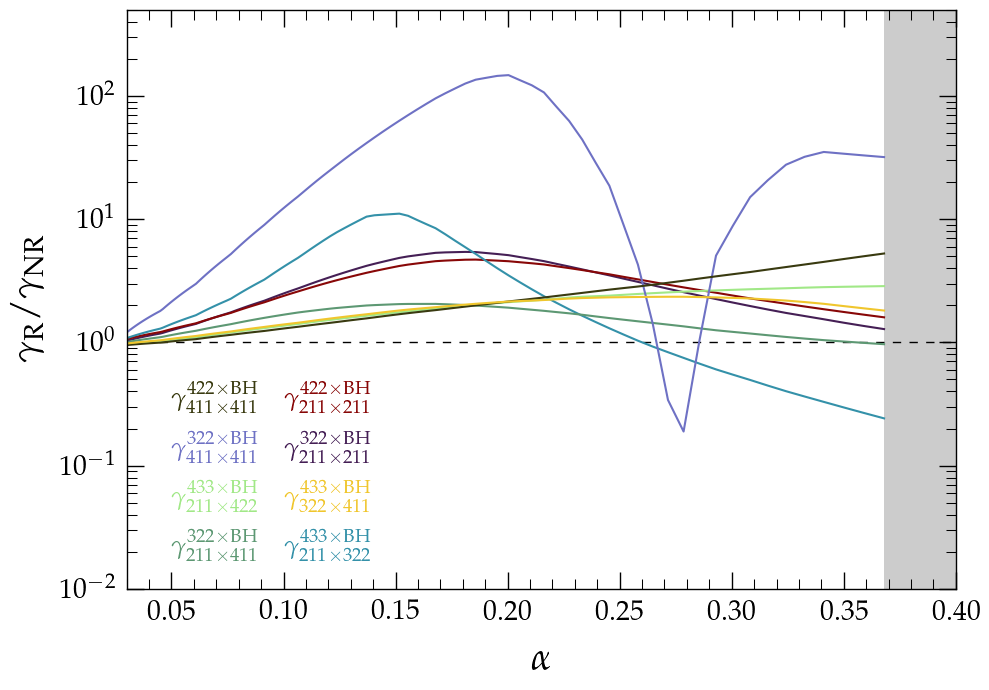

In [12]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
# apts = np.logspace(np.log10(0.03), np.log10(1), 100)
apts = np.logspace(np.log10(0.03), np.log10(0.368), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
plt.plot(np.array([0.0, 1.0]), np.array([1.0, 1.0]), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

loadIn = np.loadtxt("211_211_322_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.3e-7 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("211_211_422_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.5e-7 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)

loadIn = np.loadtxt("211_322_433_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.1e-8 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)

loadIn = np.loadtxt("211_411_322_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.5e-8 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)


loadIn = np.loadtxt("211_422_433_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 7.83e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2)) 
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4], lw=lw)


loadIn = np.loadtxt("411_411_322_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.7e-11 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)



loadIn = np.loadtxt("411_411_422_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[6], lw=lw)


loadIn = np.loadtxt("322_411_433_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.8e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[7], lw=lw)


#axs.axvspan(0.94, 2, facecolor="k", alpha=0.1)
#axs.axvspan(0.45, 2, facecolor="k", alpha=0.1)
# plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
# plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

# plt.text( 0.34, 1e4, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=20)
# plt.text( 0.7, 20, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=20)


refTop = 10**-0.5
refDif = -0.4
plt.text(0.05, refTop, r"$\boldmath \gamma_{411\times 411}^{422 \times {\rm BH}}$", fontsize=18, color=colorL[6])
plt.text(0.05, refTop*10**(refDif), r"$\boldmath \gamma_{411\times 411}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[5])
plt.text(0.05, refTop*10**(2*refDif), r"$\boldmath \gamma_{211\times 422}^{433 \times {\rm BH}}$", fontsize=18, color=colorL[4])
plt.text(0.05, refTop*10**(3*refDif), r"$\boldmath \gamma_{211\times 411}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[3])
plt.text(0.1, refTop*10**(3*refDif), r"$\boldmath \gamma_{211\times 322}^{433 \times {\rm BH}}$", fontsize=18, color=colorL[2])
plt.text(0.1, refTop, r"$\boldmath \gamma_{211\times 211}^{422 \times {\rm BH}}$", fontsize=18, color=colorL[1])
plt.text(0.1, refTop*10**(refDif), r"$\boldmath \gamma_{211\times 211}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])
plt.text(0.1, refTop*10**(2*refDif), r"$\boldmath \gamma_{322\times 411}^{433 \times {\rm BH}}$", fontsize=18, color=colorL[7])

axs.axvspan(0.368, 2, facecolor="k", alpha=0.2)


# plt.xscale("log")
plt.yscale("log")
# plt.xlim([0.03,1])
plt.xlim([0.03,0.4])
plt.ylim([0.01, 500])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_BH_n4.pdf", dpi=200)

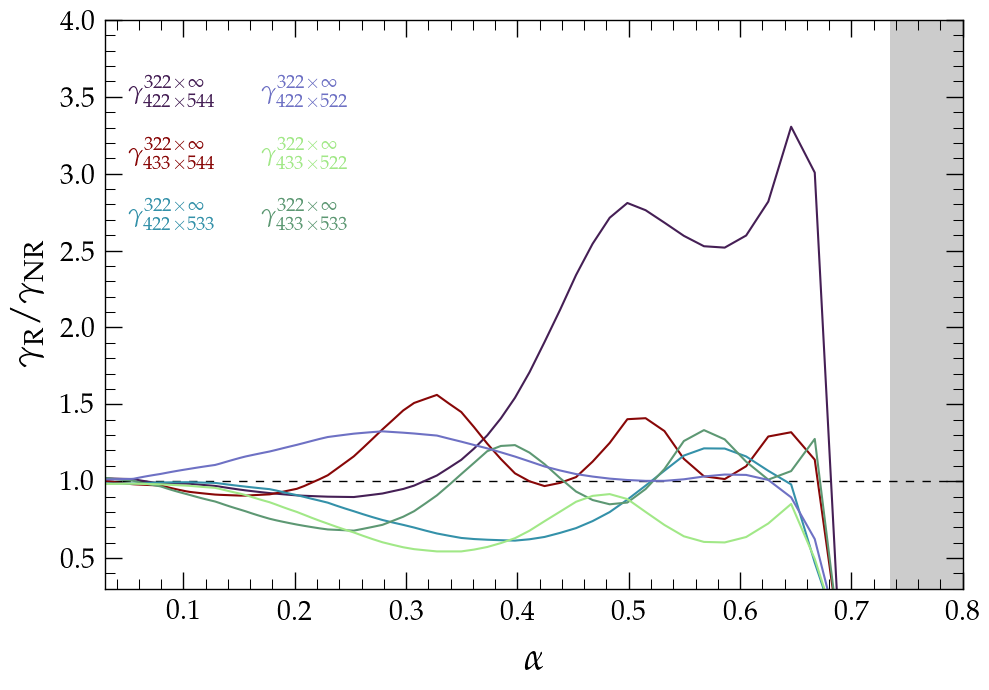

In [22]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
# apts = np.logspace(np.log10(0.03), np.log10(1), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
apts = np.logspace(np.log10(0.03), np.log10(0.735), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
plt.plot(np.array([0.0, 1.0]), np.array([1.0, 1.0]), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]


loadIn = np.loadtxt("422_544_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.5e-11 * apts**8
newP = 10**intF(np.log10(apts))
eF = 0.82
plt.plot(apts, eF * (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("433_544_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 7.8e-10 * apts**8
newP = 10**intF(np.log10(apts))
eF = 1.2
plt.plot(apts, eF * (newP ) /  ypts, colorL[1], lw=lw)


loadIn = np.loadtxt("422_533_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.24e-9 * apts**8
newP = 10**intF(np.log10(apts))
eF = 0.7
plt.plot(apts, eF * (newP ) /  ypts, colorL[2], lw=lw)

loadIn = np.loadtxt("433_533_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.8e-9 * apts**8
newP = 10**intF(np.log10(apts))
eF = 0.85
plt.plot(apts, eF * (newP ) /  ypts, colorL[3], lw=lw)



loadIn = np.loadtxt("433_522_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 6.3e-10 * apts**8
newP = 10**intF(np.log10(apts))
eF = 0.7
plt.plot(apts, eF * (newP ) /  ypts, colorL[4], lw=lw)


loadIn = np.loadtxt("422_522_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.6e-9 * apts**8
newP = 10**intF(np.log10(apts))
eF = 0.85
plt.plot(apts, eF * (newP ) /  ypts, colorL[5], lw=lw)








refTop = 3.5
refDif = 0.4
plt.text(0.05, refTop, r"$\boldmath \gamma_{422\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[0])
plt.text(0.05, refTop - (refDif), r"$\boldmath \gamma_{433\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[1])
plt.text(0.05, refTop - (2*refDif), r"$\boldmath \gamma_{422 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[2])
plt.text(0.17, refTop - (2*refDif), r"$\boldmath \gamma_{433 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[3])
plt.text(0.17, refTop - (1*refDif), r"$\boldmath \gamma_{433\times 522}^{322 \times \infty}$", fontsize=18, color=colorL[4])
plt.text(0.17, refTop, r"$\boldmath \gamma_{422\times 522}^{322 \times \infty}$", fontsize=18, color=colorL[5])


axs.axvspan(0.735, 2, facecolor="k", alpha=0.2)


# plt.xscale("log")
#plt.yscale("log")
plt.xlim([0.03,0.8])
plt.ylim([3e-1, 4])
# plt.ylim([0.2, 4])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_Inf_n5.pdf", dpi=200)

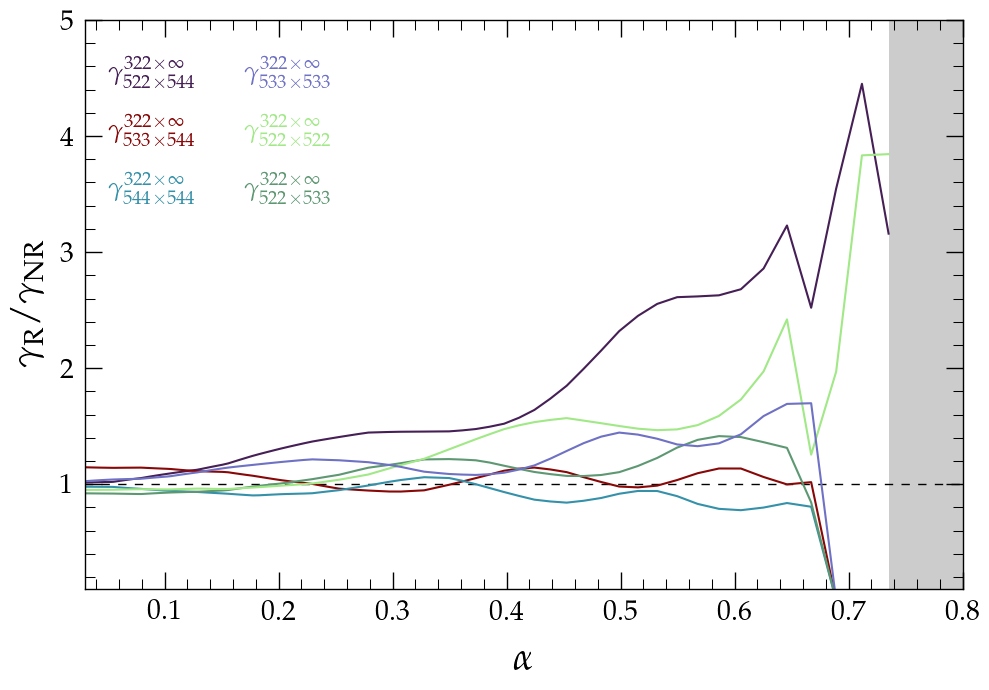

In [14]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
# apts = np.logspace(np.log10(0.03), np.log10(1), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
apts = np.logspace(np.log10(0.03), np.log10(0.735), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
plt.plot(np.array([0.0, 1.0]), np.array([1.0, 1.0]), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]


loadIn = np.loadtxt("522_544_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("533_544_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.8e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)


loadIn = np.loadtxt("544_544_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.3e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)

loadIn = np.loadtxt("522_533_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.4e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)



loadIn = np.loadtxt("522_522_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.6e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4], lw=lw)


loadIn = np.loadtxt("533_533_322_Inf_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.1e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)








#axs.axvspan(0.94, 2, facecolor="k", alpha=0.1)
#axs.axvspan(0.45, 2, facecolor="k", alpha=0.1)


refTop = 4.5
refDif = 0.5
plt.text(0.05, refTop, r"$\boldmath \gamma_{522\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[0])
plt.text(0.05, refTop - (refDif), r"$\boldmath \gamma_{533\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[1])
plt.text(0.05, refTop - (2*refDif), r"$\boldmath \gamma_{544 \times 544}^{322 \times \infty}$", fontsize=18, color=colorL[2])
plt.text(0.17, refTop - (2*refDif), r"$\boldmath \gamma_{522 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[3])
plt.text(0.17, refTop - (1*refDif), r"$\boldmath \gamma_{522 \times 522}^{322 \times \infty}$", fontsize=18, color=colorL[4])
plt.text(0.17, refTop, r"$\boldmath \gamma_{533 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[5])
#plt.text(0.06, refTop*10**(refDif), r"$\boldmath \gamma_{211\times 211}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])





axs.axvspan(0.735, 2, facecolor="k", alpha=0.2)


# plt.xscale("log")
#plt.yscale("log")
plt.xlim([0.03,0.8])
plt.ylim([1e-1, 5])
# plt.ylim([0.2, 4])


# plt.xscale("log")
# plt.yscale("log")
# plt.xlim([0.03,1])
# plt.ylim([0.01, 1e2])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_Inf_n5_2.pdf", dpi=200)

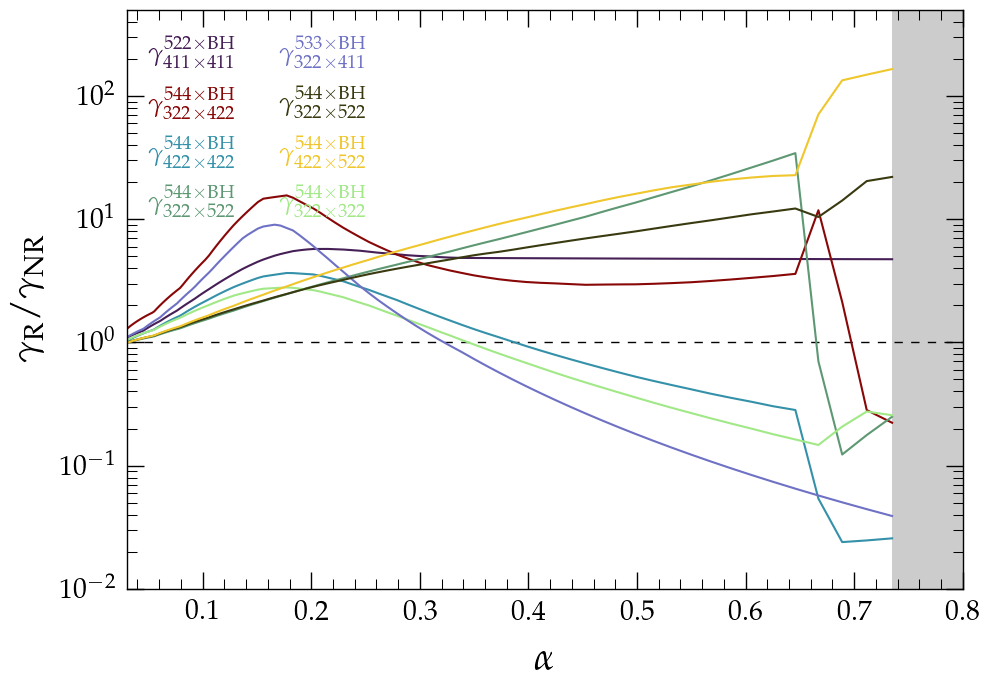

In [15]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
# apts = np.logspace(np.log10(0.03), np.log10(1), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
apts = np.logspace(np.log10(0.03), np.log10(0.735), 100)
# plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
plt.plot(np.array([0.0, 1.0]), np.array([1.0, 1.0]), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

loadIn = np.loadtxt("411_411_522_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.0e-11 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)

# loadIn = np.loadtxt("422_322_544_BH_NR.dat")
loadIn = np.loadtxt("322_422_544_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.22e-11  * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
# ypts = 6.88e-11  * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)

loadIn = np.loadtxt("422_422_544_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.3e-9  * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)


loadIn = np.loadtxt("522_522_544_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.7e-13  * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)




loadIn = np.loadtxt("322_322_544_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.9e-9  * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4], lw=lw)



loadIn = np.loadtxt("322_411_533_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.0e-8  * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)


loadIn = np.loadtxt("322_522_544_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.4e-12  * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[6], lw=lw)


loadIn = np.loadtxt("422_522_544_BH_GF_v2_.dat")
loadIn = loadIn[loadIn[:,1] != 0,:]
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.7e-14  * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[7], lw=lw)






refTop = 10**np.log10(200)
refDif = -0.4
plt.text(0.05, refTop, r"$\boldmath \gamma_{411\times 411}^{522 \times {\rm BH}}$", fontsize=18, color=colorL[0])
plt.text(0.05, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 422}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[1])
plt.text(0.05, refTop*10**(2*refDif), r"$\boldmath \gamma_{422\times 422}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[2])
plt.text(0.05, refTop*10**(3*refDif), r"$\boldmath \gamma_{322\times 522}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[3])
plt.text(0.17, refTop*10**(3*refDif), r"$\boldmath \gamma_{322\times 322}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[4])

plt.text(0.17, refTop, r"$\boldmath \gamma_{322\times 411}^{533 \times {\rm BH}}$", fontsize=18, color=colorL[5])
plt.text(0.17, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 522}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[6])
plt.text(0.17, refTop*10**(2*refDif), r"$\boldmath \gamma_{422\times 522}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[7])


axs.axvspan(0.735, 2, facecolor="k", alpha=0.2)


# plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,0.8])
plt.ylim([0.01, 500])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_BH_n5.pdf", dpi=200)

In [ ]:
### 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]

loadIn = np.loadtxt("433_433_211_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.2e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[0], lw=lw)


loadIn = np.loadtxt("422_322_211_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.64e-8 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[1], lw=lw)


loadIn = np.loadtxt("411_422_211_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[2], lw=lw)


loadIn = np.loadtxt("322_433_211_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.6e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[3], lw=lw)

loadIn = np.loadtxt("322_411_211_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.8e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ), colorL[4],lw=lw)



loadIn = np.loadtxt("322_322_211_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.15e-8 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, newP , colorL[5], lw=lw)


# refTop = 10**-1
# refDif = -0.6
# plt.text(0.034, refTop, r"$\boldmath \gamma_{322\times 322}^{211 \times \infty}$", fontsize=18, color=colorL[5])
# plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 411}^{211 \times \infty}$", fontsize=18, color=colorL[4])
# plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{322\times 433}^{211 \times \infty}$", fontsize=18, color=colorL[3])
# plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{411 \times 422}^{211 \times \infty}$", fontsize=18, color=colorL[2])
# plt.text(0.034, refTop*10**(4*refDif), r"$\boldmath \gamma_{422 \times 322}^{211 \times \infty}$", fontsize=18, color=colorL[1])
# plt.text(0.06, refTop, r"$\boldmath \gamma_{433 \times 433}^{211 \times \infty}$", fontsize=18, color=colorL[0])



# plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
# plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

# plt.text( 0.32, 50, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=22)
# plt.text( 0.68, 5, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=22)


plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([1e-30, 1e-5])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
# plt.savefig("../plts/Rates_Inf_n4.pdf", dpi=200)

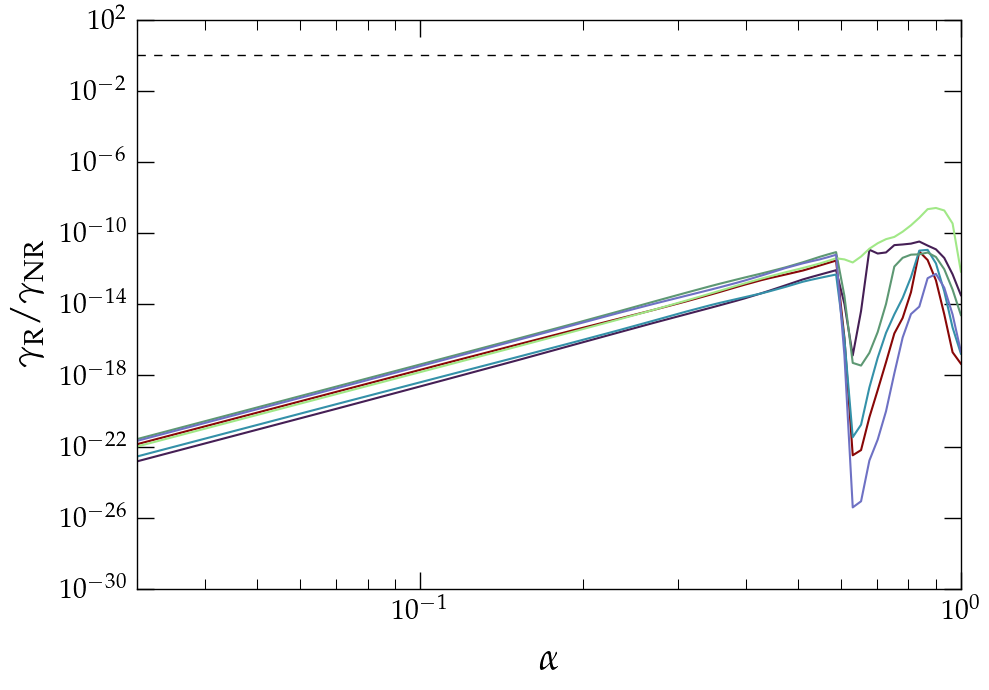

In [27]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]


loadIn = np.loadtxt("522_544_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[0], lw=lw)


loadIn = np.loadtxt("533_544_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.8e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[1], lw=lw)


loadIn = np.loadtxt("544_544_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.3e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[2], lw=lw)

loadIn = np.loadtxt("522_533_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.4e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[3], lw=lw)



loadIn = np.loadtxt("522_522_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.6e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[4], lw=lw)


loadIn = np.loadtxt("533_533_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.1e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[5], lw=lw)








#axs.axvspan(0.94, 2, facecolor="k", alpha=0.1)
#axs.axvspan(0.45, 2, facecolor="k", alpha=0.1)
# plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
# plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

# plt.text( 0.34, 40, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=20)
# plt.text( 0.7, 40, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=20)


# refTop = 10**np.log10(50)
# refDif = -0.4
# plt.text(0.034, refTop, r"$\boldmath \gamma_{522\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[0])
# plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{533\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[1])
# plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{544 \times 544}^{322 \times \infty}$", fontsize=18, color=colorL[2])
# plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{522 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[3])
# plt.text(0.06, refTop*10**(1*refDif), r"$\boldmath \gamma_{522 \times 522}^{322 \times \infty}$", fontsize=18, color=colorL[4])
# plt.text(0.06, refTop, r"$\boldmath \gamma_{533 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[5])
# #plt.text(0.06, refTop*10**(refDif), r"$\boldmath \gamma_{211\times 211}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])




plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([1e-30, 1e2])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
# plt.savefig("../plts/Rates_Inf_n5_2.pdf", dpi=200)

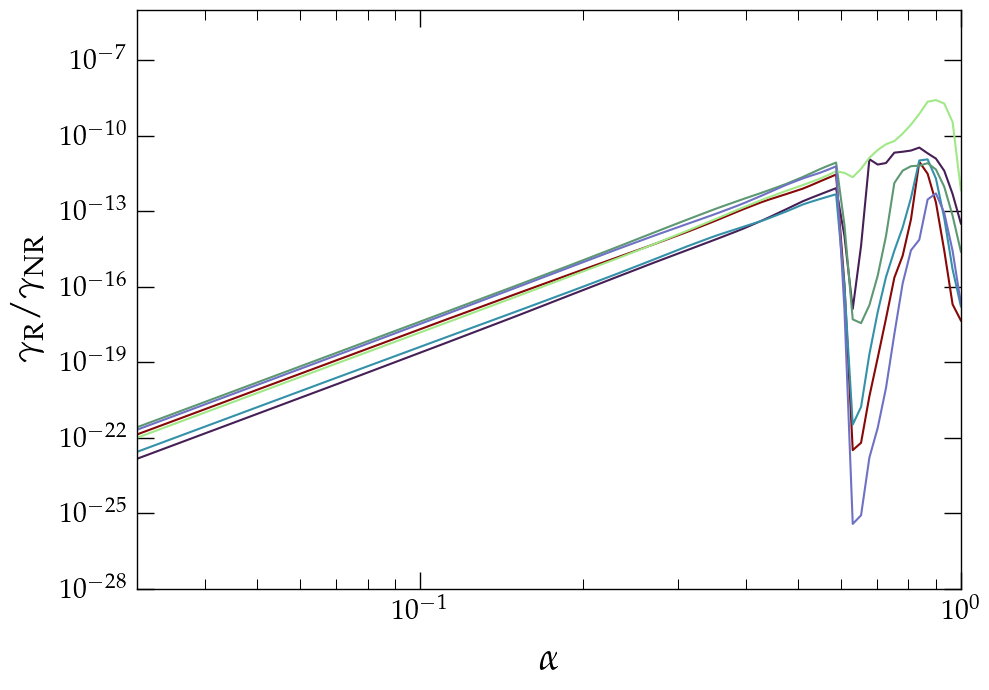

In [33]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]


loadIn = np.loadtxt("522_544_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[0], lw=lw)


loadIn = np.loadtxt("533_544_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.8e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[1], lw=lw)


loadIn = np.loadtxt("544_544_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.3e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[2], lw=lw)

loadIn = np.loadtxt("522_533_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.4e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[3], lw=lw)



loadIn = np.loadtxt("522_522_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.6e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[4], lw=lw)


loadIn = np.loadtxt("533_533_322_Inf_GF_v2_.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.1e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) , colorL[5], lw=lw)








#axs.axvspan(0.94, 2, facecolor="k", alpha=0.1)
#axs.axvspan(0.45, 2, facecolor="k", alpha=0.1)
# plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
# plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

# plt.text( 0.34, 40, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=20)
# plt.text( 0.7, 40, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=20)


# refTop = 10**np.log10(50)
# refDif = -0.4
# plt.text(0.034, refTop, r"$\boldmath \gamma_{522\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[0])
# plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{533\times 544}^{322 \times \infty}$", fontsize=18, color=colorL[1])
# plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{544 \times 544}^{322 \times \infty}$", fontsize=18, color=colorL[2])
# plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{522 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[3])
# plt.text(0.06, refTop*10**(1*refDif), r"$\boldmath \gamma_{522 \times 522}^{322 \times \infty}$", fontsize=18, color=colorL[4])
# plt.text(0.06, refTop, r"$\boldmath \gamma_{533 \times 533}^{322 \times \infty}$", fontsize=18, color=colorL[5])
# #plt.text(0.06, refTop*10**(refDif), r"$\boldmath \gamma_{211\times 211}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])




plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([1e-28, 1e-5])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
# plt.savefig("../plts/Rates_Inf_n5_2.pdf", dpi=200)

In [2]:
from scipy.signal import savgol_filter


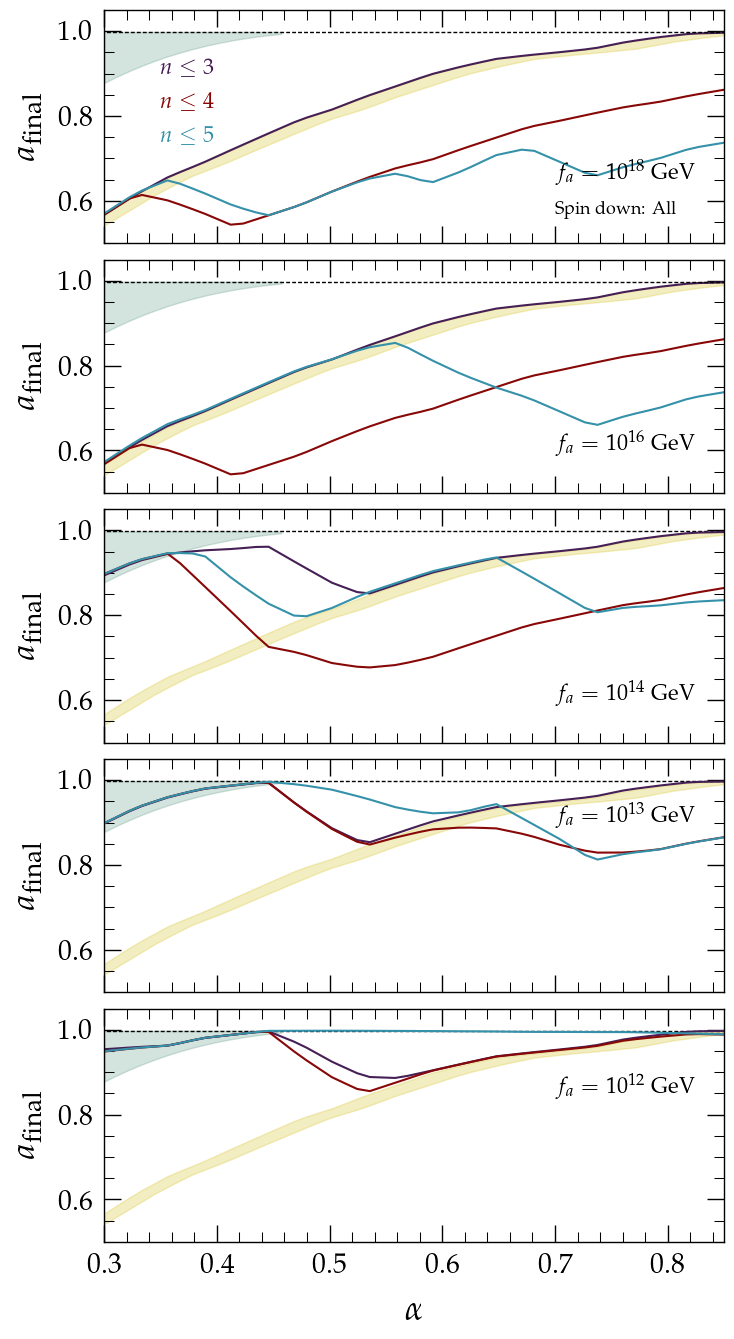

In [10]:
## sharex=True,  figsize=(10,6), gridspec_kw={'hspace': 0.07, 'height_ratios': [1, 3]}
fig, axs = plt.subplots(5,1, figsize=(8,16), sharex=True, gridspec_kw={'hspace': 0.07})
lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

a18 = np.loadtxt("../test_store/a_final_info_1.0e18_SpinBH_0.998_tauM_4.8e6_.dat")
a16 = np.loadtxt("../test_store/a_final_info_1.0e16_SpinBH_0.998_tauM_4.8e6_.dat")
a14 = np.loadtxt("../test_store/a_final_info_1.0e14_SpinBH_0.998_tauM_4.8e6_.dat")
a13 = np.loadtxt("../test_store/a_final_info_1.0e13_SpinBH_0.998_tauM_4.8e6_.dat")
a12 = np.loadtxt("../test_store/a_final_info_1.0e12_SpinBH_0.998_tauM_4.8e6_.dat")

apts = np.linspace(np.min(a12[:,0]), np.max(a12[:,0]), 50)


intF18_3 = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1) , fill_value='extrapolate', bounds_error=False)(apts)
intF18_2 = interp1d(a18[:,0], savgol_filter(a18[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_1 = interp1d(a18[:,0], savgol_filter(a18[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF16_3 = interp1d(a16[:,0], savgol_filter(a16[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_2 = interp1d(a16[:,0], savgol_filter(a16[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_1 = interp1d(a16[:,0], savgol_filter(a16[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF14_3 = interp1d(a14[:,0], savgol_filter(a14[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_2 = interp1d(a14[:,0], savgol_filter(a14[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_1 = interp1d(a14[:,0], savgol_filter(a14[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF13_3 = interp1d(a12[:,0], savgol_filter(a13[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_2 = interp1d(a12[:,0], savgol_filter(a13[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_1 = interp1d(a12[:,0], savgol_filter(a13[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)

intF12_3 = interp1d(a12[:,0], savgol_filter(a12[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_2 = interp1d(a12[:,0], savgol_filter(a12[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_1 = interp1d(a12[:,0], savgol_filter(a12[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)



a211 = 4 * (16 * apts - 4 * apts**3) / (16 + 64 * apts**2 - 32 * apts**4 + 4 * apts**6)
xi = 1.0
a322 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)
xi = 1.1
a322_2 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)

# axs[0].plot(apts, a211, "r", lw=1, ls="--")
allLis = 0.998 * np.ones(len(intF18_3))
LLOWYEL = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1) , fill_value='extrapolate', bounds_error=False)(apts * 0.95)
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[0].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[1].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[2].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[3].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[4].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)



m=1
n=2
apts2 = apts[apts < 0.46]
allLis = 0.998 * np.ones(len(apts2))
amin_guess_m1 = 8 * m * n**2 * apts2 * (2 * n**2 + apts2**2) / (16 * n**4 * apts2**2 + m**2 * (2 * n**2 + apts2**2)**2)
axs[0].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[1].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[2].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[3].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[4].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
# axs[0].plot(apts2, amin_guess_m1, color="#53917E", lw=1.4, dashes=[5,5], alpha=0.9)


axs[0].plot(apts, intF18_3, colorL[0], lw=lw)
axs[0].plot(apts, intF18_2, colorL[1], lw=lw)
axs[0].plot(apts, intF18_1, colorL[2], lw=lw)



axs[1].plot(apts, intF16_3, colorL[0], lw=lw)
axs[1].plot(apts, intF16_2, colorL[1], lw=lw)
axs[1].plot(apts, intF16_1, colorL[2], lw=lw)

axs[0].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[1].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[2].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[3].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[4].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)


axs[2].plot(apts, intF14_3, colorL[0], lw=lw)
axs[2].plot(apts, intF14_2, colorL[1], lw=lw)
axs[2].plot(apts, intF14_1, colorL[2], lw=lw)


axs[3].plot(apts, intF13_3, colorL[0], lw=lw)
axs[3].plot(apts, intF13_2, colorL[1], lw=lw)
axs[3].plot(apts, intF13_1, colorL[2], lw=lw)

axs[4].plot(apts, intF12_3, colorL[0], lw=lw)
axs[4].plot(apts, intF12_2, colorL[1], lw=lw)
axs[4].plot(apts, intF12_1, colorL[2], lw=lw)


axs[0].set_ylim([0.5, 1.05])
axs[1].set_ylim([0.5, 1.05])
axs[2].set_ylim([0.5, 1.05])
axs[3].set_ylim([0.5, 1.05])
axs[4].set_ylim([0.5, 1.05])

axs[0].set_xlim([apts[0],apts[-1]])
axs[1].set_xlim([apts[0],apts[-1]])
axs[2].set_xlim([apts[0],apts[-1]])
axs[3].set_xlim([apts[0],apts[-1]])
axs[4].set_xlim([apts[0],apts[-1]])

axs[4].set_xlabel(r"$\alpha$", fontsize=25)
axs[0].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[1].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[2].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[3].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[4].set_ylabel(r"$a_{\rm final}$", fontsize=25)


axs[0].text(0.35, 0.9, r"$n \leq 3$", fontsize=16, color=colorL[0])
axs[0].text(0.35, 0.82, r"$n \leq 4$", fontsize=16, color=colorL[1])
axs[0].text(0.35, 0.74, r"$n \leq 5$", fontsize=16, color=colorL[2])

axs[0].text(0.7, 0.65, r"$f_a = 10^{18}$ GeV", fontsize=16, color='k')
axs[0].text(0.7, 0.57, r"Spin down: All", fontsize=13, color='k')
axs[1].text(0.7, 0.6, r"$f_a = 10^{16}$ GeV", fontsize=16, color='k')
axs[2].text(0.7, 0.6, r"$f_a = 10^{14}$ GeV", fontsize=16, color='k')
axs[3].text(0.7, 0.9, r"$f_a = 10^{13}$ GeV", fontsize=16, color='k')
axs[4].text(0.7, 0.85, r"$f_a = 10^{12}$ GeV", fontsize=16, color='k')
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
# plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

#plt.tight_layout()
plt.savefig("../plts/a_final.pdf", dpi=200, bbox_inches='tight')

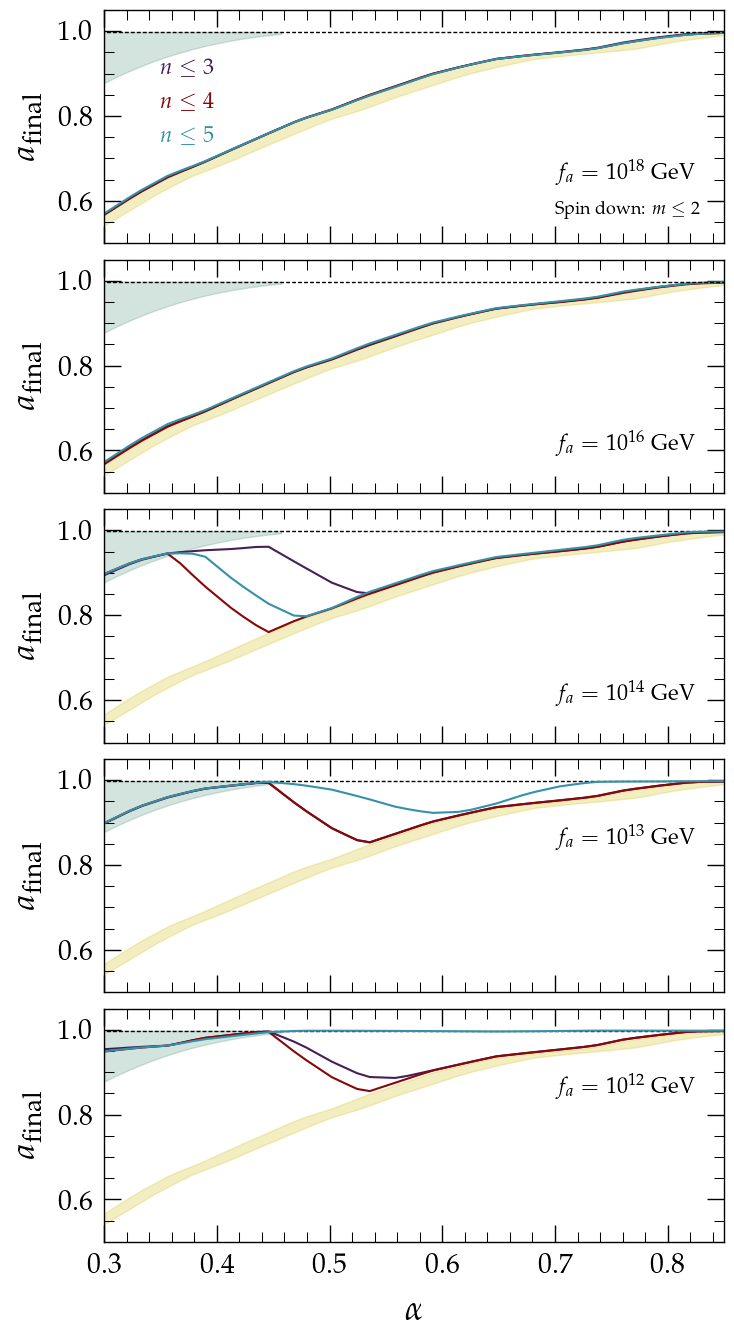

In [6]:
## sharex=True,  figsize=(10,6), gridspec_kw={'hspace': 0.07, 'height_ratios': [1, 3]}
fig, axs = plt.subplots(5,1, figsize=(8,16), sharex=True, gridspec_kw={'hspace': 0.07})
lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

a18 = np.loadtxt("../test_store/a_final_info_1.0e18_SpinBH_0.998_tauM_4.8e6_m2SD_.dat")
a16 = np.loadtxt("../test_store/a_final_info_1.0e16_SpinBH_0.998_tauM_4.8e6_m2SD_.dat")
a14 = np.loadtxt("../test_store/a_final_info_1.0e14_SpinBH_0.998_tauM_4.8e6_m2SD_.dat")
a13 = np.loadtxt("../test_store/a_final_info_1.0e13_SpinBH_0.998_tauM_4.8e6_m2SD_.dat")
a12 = np.loadtxt("../test_store/a_final_info_1.0e12_SpinBH_0.998_tauM_4.8e6_m2SD_.dat")

apts = np.linspace(np.min(a12[:,0]), np.max(a12[:,0]), 50)

intF18_3 = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_2 = interp1d(a18[:,0], savgol_filter(a18[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_1 = interp1d(a18[:,0], savgol_filter(a18[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF16_3 = interp1d(a16[:,0], savgol_filter(a16[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_2 = interp1d(a16[:,0], savgol_filter(a16[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_1 = interp1d(a16[:,0], savgol_filter(a16[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF14_3 = interp1d(a14[:,0], savgol_filter(a14[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_2 = interp1d(a14[:,0], savgol_filter(a14[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_1 = interp1d(a14[:,0], savgol_filter(a14[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF13_3 = interp1d(a12[:,0], savgol_filter(a13[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_2 = interp1d(a12[:,0], savgol_filter(a13[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_1 = interp1d(a12[:,0], savgol_filter(a13[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)

intF12_3 = interp1d(a12[:,0], savgol_filter(a12[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_2 = interp1d(a12[:,0], savgol_filter(a12[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_1 = interp1d(a12[:,0], savgol_filter(a12[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)



a211 = 4 * (16 * apts - 4 * apts**3) / (16 + 64 * apts**2 - 32 * apts**4 + 4 * apts**6)
xi = 0.93

a322 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)
xi = 1.07
a322_2 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)

allLis = 0.998 * np.ones(len(intF18_3))
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
LLOWYEL = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1) , fill_value='extrapolate', bounds_error=False)(apts * 0.95)
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[0].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[1].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[2].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[3].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[4].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)


m=1
n=2
apts2 = apts[apts < 0.46]
allLis = 0.998 * np.ones(len(apts2))
amin_guess_m1 = 8 * m * n**2 * apts2 * (2 * n**2 + apts2**2) / (16 * n**4 * apts2**2 + m**2 * (2 * n**2 + apts2**2)**2)
axs[0].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[1].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[2].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[3].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[4].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)

# axs[0].plot(apts, a211, "r", lw=1, ls="--")
# axs[0].fill_between(apts, intF18_3*0.98, intF18_3*1.02, color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, intF18_3*1.02, color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, intF18_3*1.02, color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, intF18_3*1.02, color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, intF18_3*1.02, color="#D3BC0D", lw=1, alpha=0.25)


axs[0].plot(apts, intF18_3, colorL[0], lw=lw)
axs[0].plot(apts, intF18_2, colorL[1], lw=lw)
axs[0].plot(apts, intF18_1, colorL[2], lw=lw)



axs[1].plot(apts, intF16_3, colorL[0], lw=lw)
axs[1].plot(apts, intF16_2, colorL[1], lw=lw)
axs[1].plot(apts, intF16_1, colorL[2], lw=lw)

axs[0].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[1].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[2].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[3].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)
axs[4].plot([0.0, 1.0], [0.998, 0.998], 'k', ls="--", lw=1)


axs[2].plot(apts, intF14_3, colorL[0], lw=lw)
axs[2].plot(apts, intF14_2, colorL[1], lw=lw)
axs[2].plot(apts, intF14_1, colorL[2], lw=lw)


axs[3].plot(apts, intF13_3, colorL[0], lw=lw)
axs[3].plot(apts, intF13_2, colorL[1], lw=lw)
axs[3].plot(apts, intF13_1, colorL[2], lw=lw)

axs[4].plot(apts, intF12_3, colorL[0], lw=lw)
axs[4].plot(apts, intF12_2, colorL[1], lw=lw)
axs[4].plot(apts, intF12_1, colorL[2], lw=lw)


axs[0].set_ylim([0.5, 1.05])
axs[1].set_ylim([0.5, 1.05])
axs[2].set_ylim([0.5, 1.05])
# axs[3].set_ylim([0.8, 1.03])
axs[3].set_ylim([0.5, 1.05])
axs[4].set_ylim([0.5, 1.05])
# axs[4].set_ylim([0.8, 1.03])

axs[0].set_xlim([apts[0],apts[-1]])
axs[1].set_xlim([apts[0],apts[-1]])
axs[2].set_xlim([apts[0],apts[-1]])
axs[3].set_xlim([apts[0],apts[-1]])
axs[4].set_xlim([apts[0],apts[-1]])

axs[4].set_xlabel(r"$\alpha$", fontsize=25)
axs[0].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[1].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[2].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[3].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[4].set_ylabel(r"$a_{\rm final}$", fontsize=25)


axs[0].text(0.35, 0.9, r"$n \leq 3$", fontsize=16, color=colorL[0])
axs[0].text(0.35, 0.82, r"$n \leq 4$", fontsize=16, color=colorL[1])
axs[0].text(0.35, 0.74, r"$n \leq 5$", fontsize=16, color=colorL[2])

axs[0].text(0.7, 0.65, r"$f_a = 10^{18}$ GeV", fontsize=16, color='k')
axs[0].text(0.7, 0.57, r"Spin down: $m \leq 2$", fontsize=13, color='k')
axs[1].text(0.7, 0.6, r"$f_a = 10^{16}$ GeV", fontsize=16, color='k')
axs[2].text(0.7, 0.6, r"$f_a = 10^{14}$ GeV", fontsize=16, color='k')
axs[3].text(0.7, 0.85, r"$f_a = 10^{13}$ GeV", fontsize=16, color='k')
axs[4].text(0.7, 0.85, r"$f_a = 10^{12}$ GeV", fontsize=16, color='k')
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
# plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

#plt.tight_layout()
plt.savefig("../plts/a_final_322.pdf", dpi=200, bbox_inches='tight')

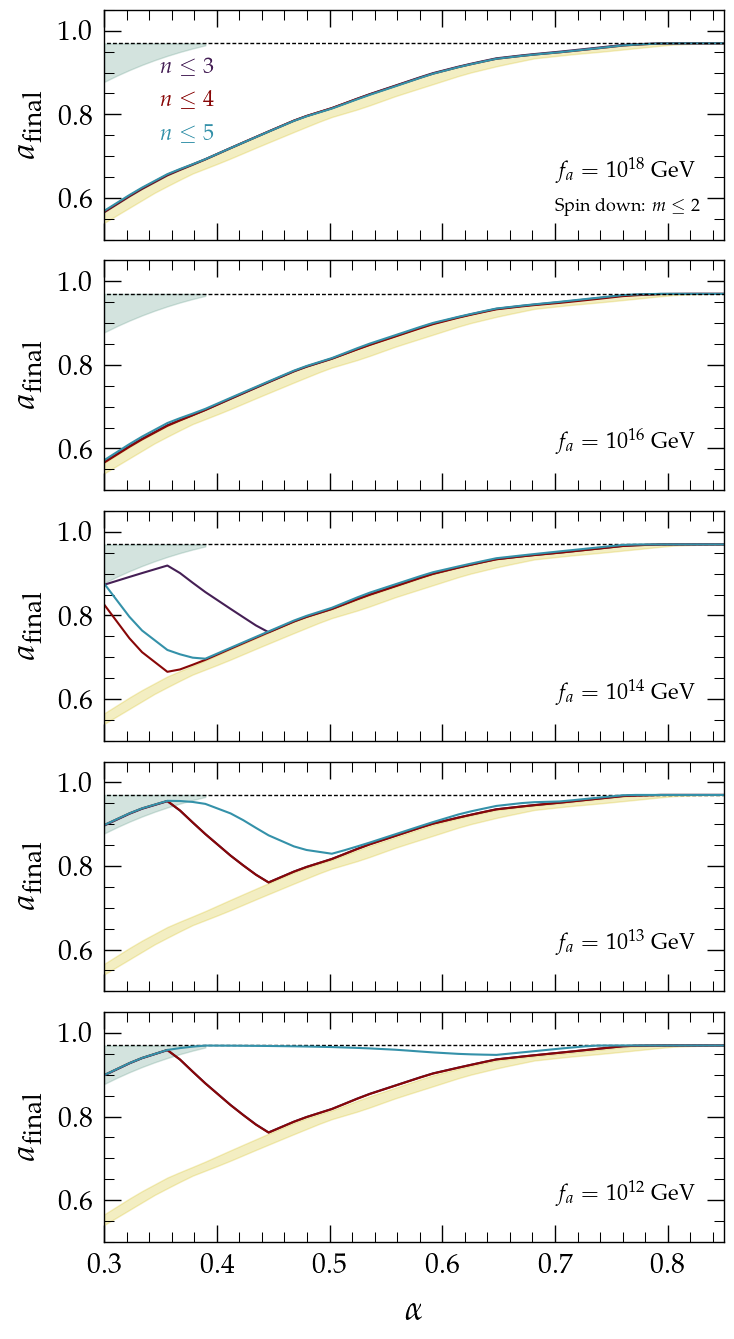

In [11]:
## sharex=True,  figsize=(10,6), gridspec_kw={'hspace': 0.07, 'height_ratios': [1, 3]}
fig, axs = plt.subplots(5,1, figsize=(8,16), sharex=True, gridspec_kw={'hspace': 0.09})
lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

a18 = np.loadtxt("../test_store/a_final_info_1.0e18_SpinBH_0.97_tauM_5.0e7_m2SD_.dat")
a16 = np.loadtxt("../test_store/a_final_info_1.0e16_SpinBH_0.97_tauM_5.0e7_m2SD_.dat")
a14 = np.loadtxt("../test_store/a_final_info_1.0e14_SpinBH_0.97_tauM_5.0e7_m2SD_.dat")
a13 = np.loadtxt("../test_store/a_final_info_1.0e13_SpinBH_0.97_tauM_5.0e7_m2SD_.dat")
a12 = np.loadtxt("../test_store/a_final_info_1.0e12_SpinBH_0.97_tauM_5.0e7_m2SD_.dat")

apts = np.linspace(np.min(a12[:,0]), np.max(a12[:,0]), 50)

intF18_3 = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_2 = interp1d(a18[:,0], savgol_filter(a18[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_1 = interp1d(a18[:,0], savgol_filter(a18[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF16_3 = interp1d(a16[:,0], savgol_filter(a16[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_2 = interp1d(a16[:,0], savgol_filter(a16[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_1 = interp1d(a16[:,0], savgol_filter(a16[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF14_3 = interp1d(a14[:,0], savgol_filter(a14[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_2 = interp1d(a14[:,0], savgol_filter(a14[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_1 = interp1d(a14[:,0], savgol_filter(a14[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF13_3 = interp1d(a12[:,0], savgol_filter(a13[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_2 = interp1d(a12[:,0], savgol_filter(a13[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_1 = interp1d(a12[:,0], savgol_filter(a13[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)

intF12_3 = interp1d(a12[:,0], savgol_filter(a12[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_2 = interp1d(a12[:,0], savgol_filter(a12[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_1 = interp1d(a12[:,0], savgol_filter(a12[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)



a211 = 4 * (16 * apts - 4 * apts**3) / (16 + 64 * apts**2 - 32 * apts**4 + 4 * apts**6)
xi = 0.93

a322 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)
xi = 1.07
a322_2 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)

# axs[0].plot(apts, a211, "r", lw=1, ls="--")
allLis =  0.97 * np.ones(len(intF18_3))
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)

LLOWYEL = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1) , fill_value='extrapolate', bounds_error=False)(apts * 0.95)
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[0].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[1].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[2].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[3].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[4].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)


m=1
n=2
apts2 = apts[apts < 0.4]
allLis = 0.97 * np.ones(len(apts2))
amin_guess_m1 = 8 * m * n**2 * apts2 * (2 * n**2 + apts2**2) / (16 * n**4 * apts2**2 + m**2 * (2 * n**2 + apts2**2)**2)
axs[0].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[1].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[2].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[3].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[4].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)


axs[0].plot(apts, intF18_3, colorL[0], lw=lw)
axs[0].plot(apts, intF18_2, colorL[1], lw=lw)
axs[0].plot(apts, intF18_1, colorL[2], lw=lw)



axs[1].plot(apts, intF16_3, colorL[0], lw=lw)
axs[1].plot(apts, intF16_2, colorL[1], lw=lw)
axs[1].plot(apts, intF16_1, colorL[2], lw=lw)

axs[0].plot([0.0, 1.0], [ 0.97,  0.97], 'k', ls="--", lw=1)
axs[1].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[2].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[3].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[4].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)


axs[2].plot(apts, intF14_3, colorL[0], lw=lw)
axs[2].plot(apts, intF14_2, colorL[1], lw=lw)
axs[2].plot(apts, intF14_1, colorL[2], lw=lw)


axs[3].plot(apts, intF13_3, colorL[0], lw=lw)
axs[3].plot(apts, intF13_2, colorL[1], lw=lw)
axs[3].plot(apts, intF13_1, colorL[2], lw=lw)

axs[4].plot(apts, intF12_3, colorL[0], lw=lw)
axs[4].plot(apts, intF12_2, colorL[1], lw=lw)
axs[4].plot(apts, intF12_1, colorL[2], lw=lw)


axs[0].set_ylim([0.5, 1.05])
axs[1].set_ylim([0.5, 1.05])
axs[2].set_ylim([0.5, 1.05])
axs[3].set_ylim([0.5, 1.05])
axs[4].set_ylim([0.5, 1.05])

axs[0].set_xlim([apts[0],apts[-1]])
axs[1].set_xlim([apts[0],apts[-1]])
axs[2].set_xlim([apts[0],apts[-1]])
axs[3].set_xlim([apts[0],apts[-1]])
axs[4].set_xlim([apts[0],apts[-1]])

axs[4].set_xlabel(r"$\alpha$", fontsize=25)
axs[0].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[1].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[2].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[3].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[4].set_ylabel(r"$a_{\rm final}$", fontsize=25)


axs[0].text(0.35, 0.9, r"$n \leq 3$", fontsize=16, color=colorL[0])
axs[0].text(0.35, 0.82, r"$n \leq 4$", fontsize=16, color=colorL[1])
axs[0].text(0.35, 0.74, r"$n \leq 5$", fontsize=16, color=colorL[2])

axs[0].text(0.7, 0.65, r"$f_a = 10^{18}$ GeV", fontsize=16, color='k')
axs[0].text(0.7, 0.57, r"Spin down: $m \leq 2$", fontsize=13, color='k')
axs[1].text(0.7, 0.6, r"$f_a = 10^{16}$ GeV", fontsize=16, color='k')
axs[2].text(0.7, 0.6, r"$f_a = 10^{14}$ GeV", fontsize=16, color='k')
axs[3].text(0.7, 0.6, r"$f_a = 10^{13}$ GeV", fontsize=16, color='k')
axs[4].text(0.7, 0.6, r"$f_a = 10^{12}$ GeV", fontsize=16, color='k')
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
# plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

#plt.tight_layout()
plt.savefig("../plts/a_final_322_grs.pdf", dpi=200,bbox_inches='tight')

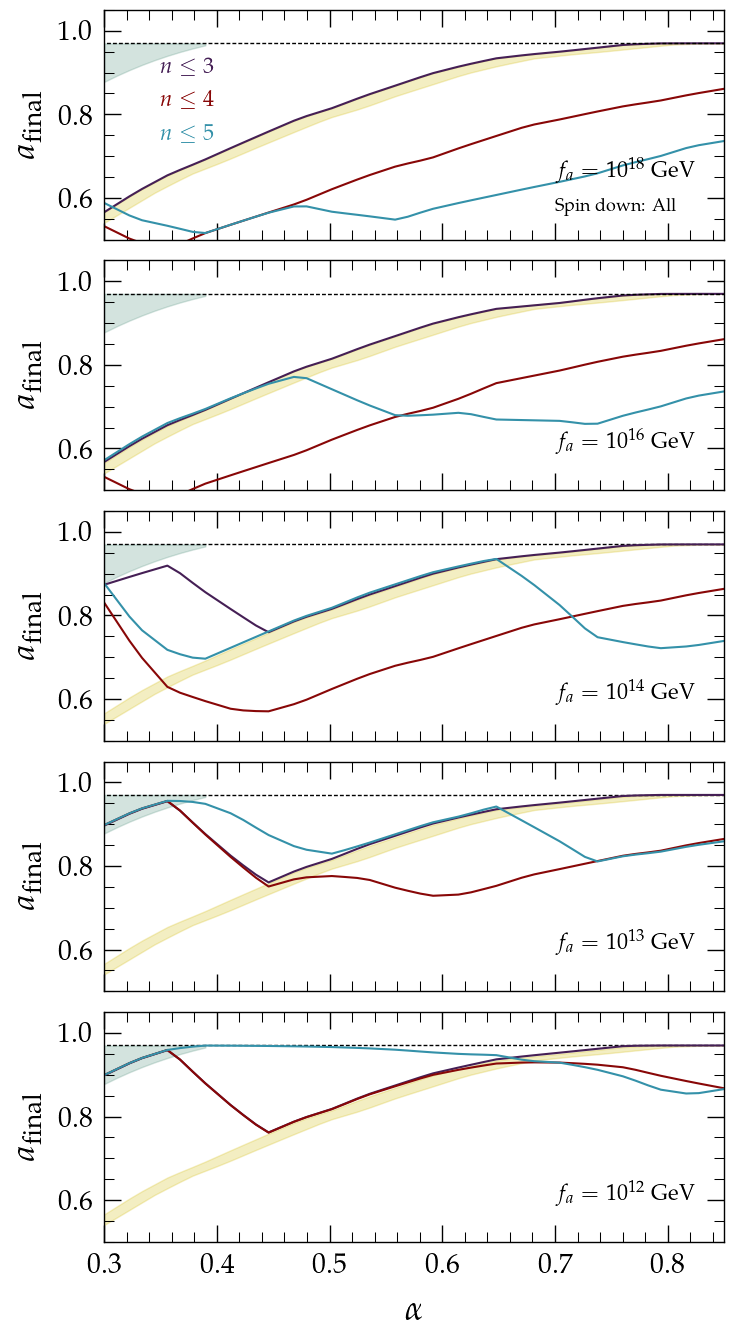

In [8]:
## sharex=True,  figsize=(10,6), gridspec_kw={'hspace': 0.07, 'height_ratios': [1, 3]}
fig, axs = plt.subplots(5,1, figsize=(8,16), sharex=True, gridspec_kw={'hspace': 0.09})
lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

a18 = np.loadtxt("../test_store/a_final_info_1.0e18_SpinBH_0.97_tauM_5.0e7_.dat")
a16 = np.loadtxt("../test_store/a_final_info_1.0e16_SpinBH_0.97_tauM_5.0e7_.dat")
a14 = np.loadtxt("../test_store/a_final_info_1.0e14_SpinBH_0.97_tauM_5.0e7_.dat")
a13 = np.loadtxt("../test_store/a_final_info_1.0e13_SpinBH_0.97_tauM_5.0e7_.dat")
a12 = np.loadtxt("../test_store/a_final_info_1.0e12_SpinBH_0.97_tauM_5.0e7_.dat")

apts = np.linspace(np.min(a12[:,0]), np.max(a12[:,0]), 50)

intF18_3 = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_2 = interp1d(a18[:,0], savgol_filter(a18[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF18_1 = interp1d(a18[:,0], savgol_filter(a18[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF16_3 = interp1d(a16[:,0], savgol_filter(a16[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_2 = interp1d(a16[:,0], savgol_filter(a16[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF16_1 = interp1d(a16[:,0], savgol_filter(a16[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF14_3 = interp1d(a14[:,0], savgol_filter(a14[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_2 = interp1d(a14[:,0], savgol_filter(a14[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF14_1 = interp1d(a14[:,0], savgol_filter(a14[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)


intF13_3 = interp1d(a12[:,0], savgol_filter(a13[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_2 = interp1d(a12[:,0], savgol_filter(a13[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF13_1 = interp1d(a12[:,0], savgol_filter(a13[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)

intF12_3 = interp1d(a12[:,0], savgol_filter(a12[:,1], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_2 = interp1d(a12[:,0], savgol_filter(a12[:,2], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)
intF12_1 = interp1d(a12[:,0], savgol_filter(a12[:,3], 3, 1), fill_value='extrapolate', bounds_error=False)(apts)



a211 = 4 * (16 * apts - 4 * apts**3) / (16 + 64 * apts**2 - 32 * apts**4 + 4 * apts**6)
xi = 0.93

a322 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)
xi = 1.07
a322_2 = - (18 * apts * (-9 + apts**2) * xi) / (81 + apts**2 * (-9 + apts**2)**2 *xi**2)

allLis = 0.98 * np.ones(len(apts))
# axs[0].plot(apts, a211, "r", lw=1, ls="--")
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.02, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)

LLOWYEL = interp1d(a18[:,0], savgol_filter(a18[:,1], 3, 1) , fill_value='extrapolate', bounds_error=False)(apts * 0.95)
# axs[0].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[1].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[2].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[3].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
# axs[4].fill_between(apts, intF18_3*0.98, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[0].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[1].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[2].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[3].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)
axs[4].fill_between(apts, LLOWYEL, np.min([intF18_3*1.00, allLis], axis=0), color="#D3BC0D", lw=1, alpha=0.25)


m=1
n=2
apts2 = apts[apts < 0.4]
allLis = 0.97 * np.ones(len(apts2))
amin_guess_m1 = 8 * m * n**2 * apts2 * (2 * n**2 + apts2**2) / (16 * n**4 * apts2**2 + m**2 * (2 * n**2 + apts2**2)**2)
axs[0].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[1].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[2].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[3].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)
axs[4].fill_between(apts2, amin_guess_m1, allLis, color="#53917E", lw=1, alpha=0.25)


axs[0].plot(apts, intF18_3, colorL[0], lw=lw)
axs[0].plot(apts, intF18_2, colorL[1], lw=lw)
axs[0].plot(apts, intF18_1, colorL[2], lw=lw)



axs[1].plot(apts, intF16_3, colorL[0], lw=lw)
axs[1].plot(apts, intF16_2, colorL[1], lw=lw)
axs[1].plot(apts, intF16_1, colorL[2], lw=lw)

axs[0].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[1].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[2].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[3].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)
axs[4].plot([0.0, 1.0], [0.97,  0.97], 'k', ls="--", lw=1)




axs[2].plot(apts, intF14_3, colorL[0], lw=lw)
axs[2].plot(apts, intF14_2, colorL[1], lw=lw)
axs[2].plot(apts, intF14_1, colorL[2], lw=lw)


axs[3].plot(apts, intF13_3, colorL[0], lw=lw)
axs[3].plot(apts, intF13_2, colorL[1], lw=lw)
axs[3].plot(apts, intF13_1, colorL[2], lw=lw)

axs[4].plot(apts, intF12_3, colorL[0], lw=lw)
axs[4].plot(apts, intF12_2, colorL[1], lw=lw)
axs[4].plot(apts, intF12_1, colorL[2], lw=lw)


axs[0].set_ylim([0.5, 1.05])
axs[1].set_ylim([0.5, 1.05])
axs[2].set_ylim([0.5, 1.05])
axs[3].set_ylim([0.5, 1.05])
axs[4].set_ylim([0.5, 1.05])

axs[0].set_xlim([apts[0],apts[-1]])
axs[1].set_xlim([apts[0],apts[-1]])
axs[2].set_xlim([apts[0],apts[-1]])
axs[3].set_xlim([apts[0],apts[-1]])
axs[4].set_xlim([apts[0],apts[-1]])

axs[4].set_xlabel(r"$\alpha$", fontsize=25)
axs[0].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[1].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[2].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[3].set_ylabel(r"$a_{\rm final}$", fontsize=25)
axs[4].set_ylabel(r"$a_{\rm final}$", fontsize=25)


axs[0].text(0.35, 0.9, r"$n \leq 3$", fontsize=16, color=colorL[0])
axs[0].text(0.35, 0.82, r"$n \leq 4$", fontsize=16, color=colorL[1])
axs[0].text(0.35, 0.74, r"$n \leq 5$", fontsize=16, color=colorL[2])

axs[0].text(0.7, 0.65, r"$f_a = 10^{18}$ GeV", fontsize=16, color='k')
axs[0].text(0.7, 0.57, r"Spin down: All", fontsize=13, color='k')
axs[1].text(0.7, 0.6, r"$f_a = 10^{16}$ GeV", fontsize=16, color='k')
axs[2].text(0.7, 0.6, r"$f_a = 10^{14}$ GeV", fontsize=16, color='k')
axs[3].text(0.7, 0.6, r"$f_a = 10^{13}$ GeV", fontsize=16, color='k')
axs[4].text(0.7, 0.6, r"$f_a = 10^{12}$ GeV", fontsize=16, color='k')
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
# plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

# plt.tight_layout()
plt.savefig("../plts/a_final_grs.pdf", dpi=200,bbox_inches='tight')

In [4]:
fa = 1e16
faFac = (1.22e19 / fa)**4
M = 22.2
GNew = 7484169213.942



In [5]:
gam322 = np.loadtxt("../test_store/322_new_spin_0.9_test.dat")[::-1]
gam422 = np.loadtxt("../test_store/422_new_spin_0.9_test.dat")[::-1]
gam522 = np.loadtxt("../test_store/522_new_spin_0.9_test.dat")[::-1]

gam322[:,1] *= 1 / GNew
gam422[:,1] *= 1 / GNew
gam522[:,1] *= 1 / GNew


gamma553 = np.loadtxt("544_544_322_Inf_GF_v2_.dat")
gamma553 = gamma553[gamma553[:,1] >0]
gamma553[:,1] *= faFac
gamma335 = np.loadtxt("322_322_544_BH_GF_v2_.dat") 
gamma335 = gamma335[gamma335[:,1] >0]
gamma335[:,1] *= faFac

gamma345 = np.loadtxt("322_422_544_BH_GF_v2_.dat") 
gamma345 = gamma345[gamma345[:,1] >0]
gamma345[:,1] *= faFac

gamma445 = np.loadtxt("422_422_544_BH_GF_v2_.dat") 
gamma445 = gamma445[gamma445[:,1] >0]
gamma445[:,1] *= faFac

In [6]:
g322SR = interp1d(np.log10(gam322[:,0]), np.log10(gam322[:,1]), fill_value='extrapolate', bounds_error=False) 
g422SR = interp1d(np.log10(gam422[:,0]), np.log10(gam422[:,1]), fill_value='extrapolate', bounds_error=False)
g522SR = interp1d(np.log10(gam522[:,0]), np.log10(gam522[:,1]), fill_value='extrapolate', bounds_error=False)
g533S = interp1d(np.log10(gamma553[:,0]), np.log10(gamma553[:,1]), fill_value='extrapolate', bounds_error=False)
g335S = interp1d(np.log10(gamma335[:,0]), np.log10(gamma335[:,1]), fill_value='extrapolate', bounds_error=False)

g345S = interp1d(np.log10(gamma345[:,0]), np.log10(gamma345[:,1]), fill_value='extrapolate', bounds_error=False)
g445S = interp1d(np.log10(gamma445[:,0]), np.log10(gamma445[:,1]), fill_value='extrapolate', bounds_error=False)



(0.1, 10.0)

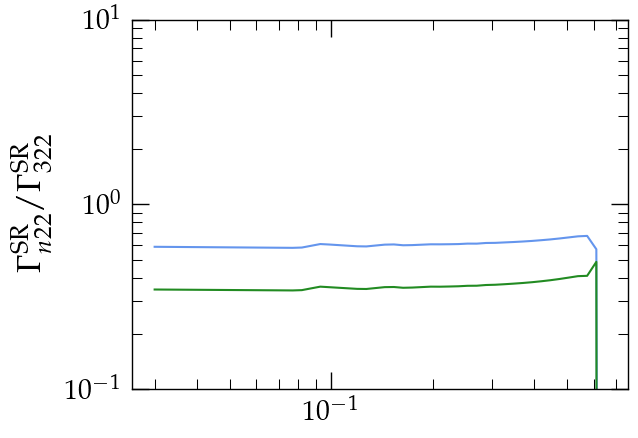

In [7]:
alphaV = np.logspace(np.log10(0.03), np.log10(.65), 50)

plt.plot(alphaV, 10**g422SR(np.log10(alphaV)) / 10**g322SR(np.log10(alphaV)))
plt.plot(alphaV, 10**g522SR(np.log10(alphaV)) / 10**g322SR(np.log10(alphaV)))

plt.ylabel(r"$\Gamma^{\rm SR}_{n22} / \Gamma^{\rm SR}_{322}$", fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-1, 1e1])

(0.01, 1000.0)

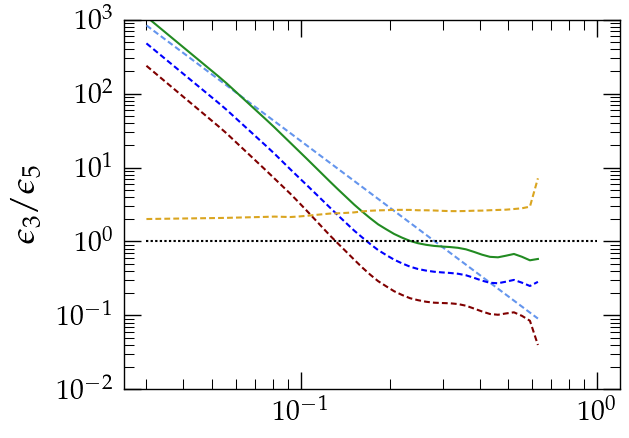

In [9]:
alphaV = np.logspace(np.log10(0.03), np.log10(.63), 50)

e3Ana = 20.7 / alphaV / np.sqrt(faFac)
e5Ana = 914.99 * alphaV**2 / np.sqrt(faFac)

plt.plot(alphaV, e3Ana / e5Ana , ls="dashed")

ee3 = (np.sqrt(10**g322SR(np.log10(alphaV))) * np.sqrt(10**g533S(np.log10(alphaV))) / 10**g335S(np.log10(alphaV)))
ee5 = ( np.sqrt(10**g322SR(np.log10(alphaV))) / np.sqrt(10**g533S(np.log10(alphaV)))) / 2
e3oe5 = ee3 / ee5
plt.plot(alphaV, e3oe5 )


# plt.plot(alphaV, gsr422 / (g345v * ee3 * ee5))
g445v = 10**g445S(np.log10(alphaV))
#g345v = 10**g345S(np.log10(alphaV))
g553v = 10**g533S(np.log10(alphaV))
g335v = 10**g335S(np.log10(alphaV))
gsr322 = 10**g322SR(np.log10(alphaV))
gsr422 = 10**g422SR(np.log10(alphaV))

ee32 = np.sqrt(g445v * g553v) * gsr322**1.5 / np.sqrt(2 * g335v**2 * g445v * gsr322**2 + g335v**3 * gsr422**2)
ee52 = np.sqrt(g335v**2 * (2 * g445v * gsr322**2 + g335v * gsr422**2)) / (2 * g335v * np.sqrt(g445v * g553v * gsr322))
ee42 = g335v * np.sqrt(g553v * gsr322) * gsr422 / np.sqrt(g445v * g335v**2 * (2 * g445v * gsr322**2 + g335v * gsr422**2))
plt.plot(alphaV, ee32 / ee52, ls="dashed", c= "b")
plt.plot(alphaV, ee42 / ee52, ls="dashed")
plt.plot(alphaV, ee32 / ee42, ls="dashed")

plt.plot([0.03, 1],[1,1], ls="dotted", c="k")
plt.ylabel(r"$\epsilon_3 / \epsilon_5$", fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-2, 1e3])

In [37]:
ee5

array([8.52511201e-07, 9.49748340e-07, 1.05807631e-06, 1.17876014e-06,
       1.31320912e-06, 1.46299331e-06, 1.62986183e-06, 1.81576332e-06,
       2.02286867e-06, 2.25359638e-06, 2.51167004e-06, 2.80203933e-06,
       3.12597767e-06, 3.48736588e-06, 3.89053348e-06, 4.34031051e-06,
       4.84064697e-06, 5.34299606e-06, 5.89747757e-06, 6.50950164e-06,
       7.18503990e-06, 7.92744915e-06, 8.74624608e-06, 9.64477801e-06,
       1.05503854e-05, 1.15476423e-05, 1.26391631e-05, 1.38438604e-05,
       1.51085229e-05, 1.64009908e-05, 1.77110336e-05, 1.90992283e-05,
       2.05217084e-05, 2.20003879e-05, 2.33741666e-05, 2.47242065e-05,
       2.60132006e-05, 2.72759440e-05, 2.85753966e-05, 3.01090115e-05,
       3.21175671e-05, 3.47672650e-05, 3.76872992e-05, 4.04680339e-05,
       4.20955635e-05, 4.22533439e-05, 4.21327826e-05, 4.44057560e-05,
       4.50639501e-05, 1.88344610e-05])

In [38]:
alphaV

array([0.03      , 0.03192312, 0.03396952, 0.0361471 , 0.03846427,
       0.04092999, 0.04355376, 0.04634573, 0.04931668, 0.05247807,
       0.05584212, 0.05942183, 0.063231  , 0.06728436, 0.07159756,
       0.07618724, 0.08107115, 0.08626813, 0.09179826, 0.0976829 ,
       0.10394476, 0.11060803, 0.11769845, 0.12524339, 0.13327199,
       0.14181525, 0.15090617, 0.16057986, 0.17087367, 0.18182735,
       0.1934832 , 0.20588625, 0.21908438, 0.23312856, 0.24807302,
       0.26397549, 0.28089737, 0.29890401, 0.31806495, 0.33845418,
       0.36015044, 0.38323751, 0.40780456, 0.43394646, 0.46176415,
       0.49136507, 0.52286353, 0.55638116, 0.59204741, 0.63      ])

In [39]:
gamma7grow = np.loadtxt("322_544_766_BH_.dat")
gamma7grow = gamma7grow[gamma7grow[:,1] >0]
gamma7die = np.loadtxt("766_544_322_Inf_.dat")
gamma7die = gamma7die[gamma7die[:,1] >0]

g7GS = interp1d(np.log10(gamma7grow[:,0]), np.log10(gamma7grow[:,1]), fill_value='extrapolate', bounds_error=False)
g7DS = interp1d(np.log10(gamma7die[:,0]), np.log10(gamma7die[:,1]), fill_value='extrapolate', bounds_error=False)

(0.001, 1000.0)

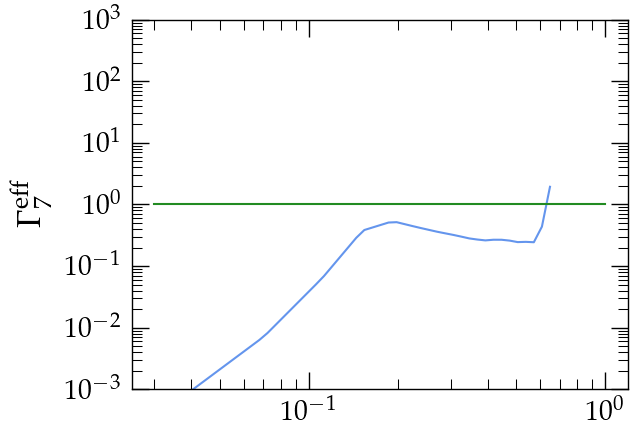

In [40]:
alphaV = np.logspace(np.log10(0.03), np.log10(.65), 50)

plt.plot(alphaV, 10**g7GS(np.log10(alphaV)) / 10**g7DS(np.log10(alphaV)))

plt.plot([0.03, 1],[1,1])
plt.ylabel(r"$\Gamma_7^{\rm eff}$", fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-3, 1e3])

In [41]:
gamma336 = np.loadtxt("322_322_644_BH_.dat")
gamma336 = gamma336[gamma336[:,1] >0]

#gamma346 = np.loadtxt("322_422_644_BH_.dat")
#gamma346 = gamma346[gamma346[:,1] >0]

gamma653 = np.loadtxt("644_544_322_Inf_.dat")
gamma653 = gamma653[gamma653[:,1] >0]

g6GS = interp1d(np.log10(gamma336[:,0]), np.log10(gamma336[:,1]), fill_value='extrapolate', bounds_error=False)
#g6GS_2 = interp1d(np.log10(gamma346[:,0]), np.log10(gamma346[:,1]), fill_value='extrapolate', bounds_error=False)
g6DS = interp1d(np.log10(gamma653[:,0]), np.log10(gamma653[:,1]), fill_value='extrapolate', bounds_error=False)

(0.001, 1000.0)

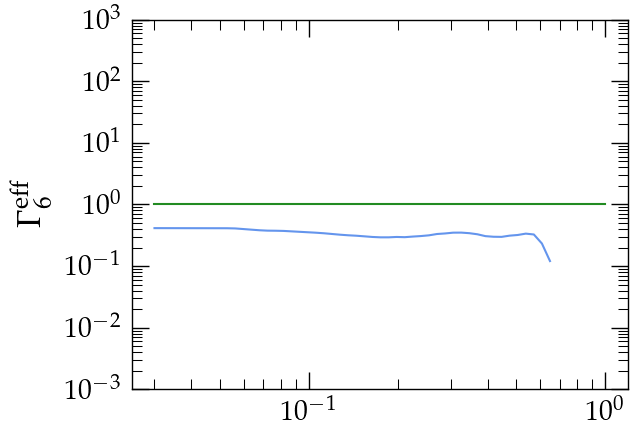

In [42]:

numer = 10**g6GS(np.log10(alphaV)) * ee3
denom = 10**g6DS(np.log10(alphaV)) * ee5
plt.plot(alphaV,  numer /  denom)

plt.plot([0.03, 1],[1,1])
plt.ylabel(r"$\Gamma_6^{\rm eff}$", fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-3, 1e3])

In [43]:
gamma457 = np.loadtxt("422_544_766_BH_.dat")
gamma457 = gamma457[gamma457[:,1] >0]
gamma754 = np.loadtxt("766_544_422_Inf_.dat")
gamma754 = gamma754[gamma754[:,1] >0]

g7GS_2 = interp1d(np.log10(gamma457[:,0]), np.log10(gamma457[:,1]), fill_value='extrapolate', bounds_error=False)
g7DS_2 = interp1d(np.log10(gamma754[:,0]), np.log10(gamma754[:,1]), fill_value='extrapolate', bounds_error=False)

(0.5, 2.0)

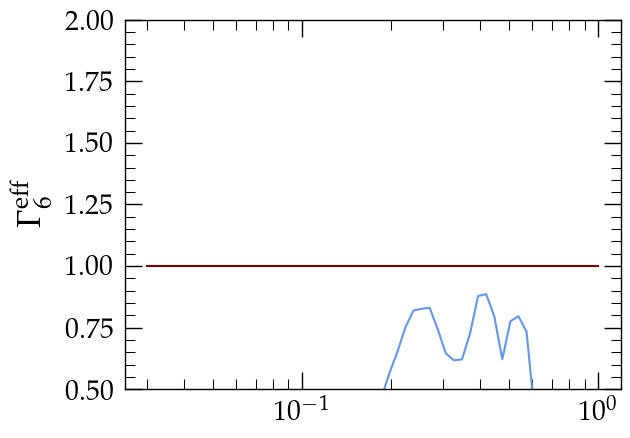

In [44]:
plt.plot(alphaV,  10**g7GS_2(np.log10(alphaV))  /  (10**g7DS_2(np.log10(alphaV)) + 10**g7DS(np.log10(alphaV)) * 10) )
plt.plot(alphaV,  10**g7GS(np.log10(alphaV))  /  (10**g7DS_2(np.log10(alphaV)) + 10**g7DS(np.log10(alphaV)) * 10) )

plt.plot([0.03, 1],[1,1])
plt.ylabel(r"$\Gamma_6^{\rm eff}$", fontsize=24)
#plt.yscale("log")
plt.xscale("log")
plt.ylim([.5, 2])

In [45]:





gamma559 = np.loadtxt("544_544_988_BH_.dat")
gamma559 = gamma559[gamma559[:,1] >0]
gamma559[:,1] *= faFac
gamma995 = np.loadtxt("988_988_544_Inf_.dat")
gamma995 = gamma995[gamma995[:,1] >0]
gamma995[:,1] *= faFac

gamma953 = np.loadtxt("988_544_322_Inf_.dat") ## very small....?
gamma953 = gamma953[gamma953[:,1] >0]
gamma953[:,1] *= faFac

g9GS = interp1d(np.log10(gamma559[:,0]), np.log10(gamma559[:,1]), fill_value='extrapolate', bounds_error=False)
g9DS = interp1d(np.log10(gamma995[:,0]), np.log10(gamma995[:,1]), fill_value='extrapolate', bounds_error=False)
g9DS_2 = interp1d(np.log10(gamma953[:,0]), np.log10(gamma953[:,1]), fill_value='extrapolate', bounds_error=False)

(0.001, 1000.0)

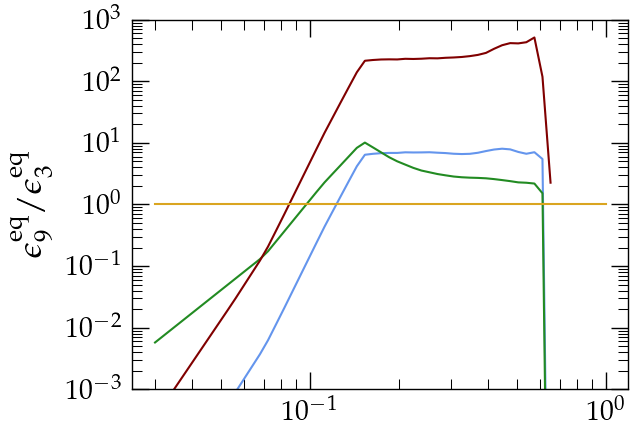

In [46]:
# e9eq = ee5 * 10**g9GS(np.log10(alphaV)) / 10**g9DS(np.log10(alphaV))
e9eq = 10**g9GS(np.log10(alphaV)) * np.sqrt(10**g322SR(np.log10(alphaV))) / (10**g9DS(np.log10(alphaV)) * np.sqrt(10**g533S(np.log10(alphaV))))
plt.plot(alphaV, e9eq / ee3)
plt.plot(alphaV, e9eq / ee5)
#plt.plot(alphaV, e9eq / ee3)
# plt.plot(alphaV, e9eq / ee5)

testGrow = 10**g9GS(np.log10(alphaV)) * ee5 / (10**g9DS_2(np.log10(alphaV)) * ee3)
plt.plot(alphaV, testGrow)

plt.plot([0.03, 1],[1,1])
plt.ylabel(r"$\epsilon_9^{\rm eq} / \epsilon_3^{\rm eq}$", fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-3, 1e3])

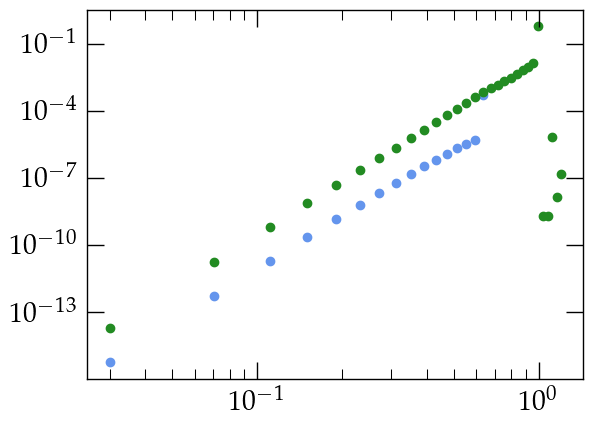

In [47]:
plt.scatter(gamma953[:,0], gamma953[:,1])
plt.scatter(gamma995[:,0], gamma995[:,1])

plt.yscale("log")
plt.xscale("log")

In [25]:
gamma5die = np.loadtxt("322_522_544_BH_GF_v2_.dat")
gamma5die = gamma5die[gamma5die[:,1] >0]
gamma5die[:,1] *= faFac

gamma5die2 = np.loadtxt("522_544_322_Inf_GF_v2_.dat")
gamma5die2 = gamma5die2[gamma5die2[:,1] >0]
gamma5die2[:,1] *= faFac

gamma4die = np.loadtxt("322_422_544_BH_GF_v2_.dat")
gamma4die = gamma4die[gamma4die[:,1] >0]
gamma4die[:,1] *= faFac

gamma4die2 = np.loadtxt("422_544_322_Inf_GF_v2_.dat")
gamma4die2 = gamma4die2[gamma4die2[:,1] >0]
gamma4die2[:,1] *= faFac


g5d = interp1d(np.log10(gamma5die[:,0]), np.log10(gamma5die[:,1]), fill_value='extrapolate', bounds_error=False)
g5d_2 = interp1d(np.log10(gamma5die2[:,0]), np.log10(gamma5die2[:,1]), fill_value='extrapolate', bounds_error=False)
g4d = interp1d(np.log10(gamma4die[:,0]), np.log10(gamma4die[:,1]), fill_value='extrapolate', bounds_error=False)
g4d_2 = interp1d(np.log10(gamma4die2[:,0]), np.log10(gamma4die2[:,1]), fill_value='extrapolate', bounds_error=False)

(0.001, 1000.0)

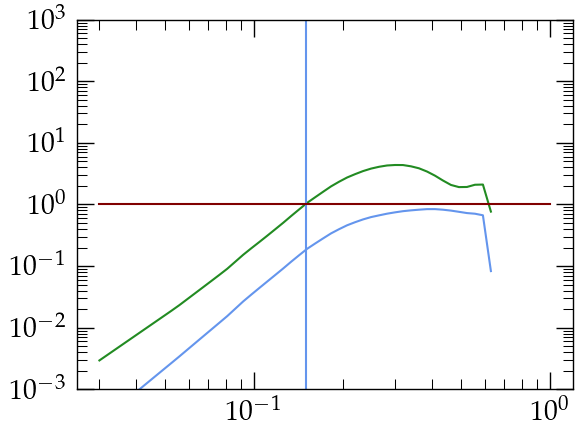

In [29]:
tt = 10**g522SR(np.log10(alphaV)) / ((10**g5d(np.log10(alphaV)) + 10**g5d_2(np.log10(alphaV))) * ee3 * ee5 )

tt2 = 10**g422SR(np.log10(alphaV)) / (10**g4d(np.log10(alphaV)) * ee3 * ee5)
tt3 = 10**g422SR(np.log10(alphaV)) / (10**g4d_2(np.log10(alphaV)) * ee3 * ee5)

plt.plot(alphaV, tt)
plt.plot(alphaV, tt3)

plt.axvline(.15)
# plt.plot(alphaV, tt3)
plt.plot([0.03, 1],[1,1])
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-3, 1e3])

In [114]:


g335 = np.loadtxt("322_322_544_BH_GF_v2_.dat")
g335 = g335[g335[:,1] >0]
finalA = g335[-1, 0]
g335I = interp1d(np.log10(g335[:,0]), np.log10(g335[:,1]), fill_value='extrapolate', bounds_error=False)

g336 = np.loadtxt("322_322_644_BH_.dat")
g336 = g336[g336[:,1] >0]
g336I = interp1d(np.log10(g336[:,0]), np.log10(g336[:,1]), fill_value='extrapolate', bounds_error=False)

g337 = np.loadtxt("322_322_744_BH_.dat")
g337 = g337[g337[:,1] >0]
g337I = interp1d(np.log10(g337[:,0]), np.log10(g337[:,1]), fill_value='extrapolate', bounds_error=False)

g338 = np.loadtxt("322_322_844_BH_.dat")
g338 = g338[g338[:,1] >0]
g338I = interp1d(np.log10(g338[:,0]), np.log10(g338[:,1]), fill_value='extrapolate', bounds_error=False)

g339 = np.loadtxt("322_322_944_BH_.dat")
g339 = g339[g339[:,1] >0]
g339I = interp1d(np.log10(g339[:,0]), np.log10(g339[:,1]), fill_value='extrapolate', bounds_error=False)



g553 = np.loadtxt("544_544_322_Inf_GF_v2_.dat")
g553 = g553[g553[:,1] >0]
g533I = interp1d(np.log10(g553[:,0]), np.log10(g553[:,1]), fill_value='extrapolate', bounds_error=False)

g663 = np.loadtxt("644_644_322_Inf_.dat")
g663 = g663[g663[:,1] >0]
g663I = interp1d(np.log10(g663[:,0]), np.log10(g663[:,1]), fill_value='extrapolate', bounds_error=False)


g773 = np.loadtxt("744_744_322_Inf_.dat")
g773 = g773[g773[:,1] >0]
g773I = interp1d(np.log10(g773[:,0]), np.log10(g773[:,1]), fill_value='extrapolate', bounds_error=False)

g883 = np.loadtxt("844_844_322_Inf_.dat")
g883 = g883[g883[:,1] >0]
g883I = interp1d(np.log10(g883[:,0]), np.log10(g883[:,1]), fill_value='extrapolate', bounds_error=False)

g993 = np.loadtxt("944_944_322_Inf_.dat")
g993 = g993[g993[:,1] >0]
g993I = interp1d(np.log10(g993[:,0]), np.log10(g993[:,1]), fill_value='extrapolate', bounds_error=False)


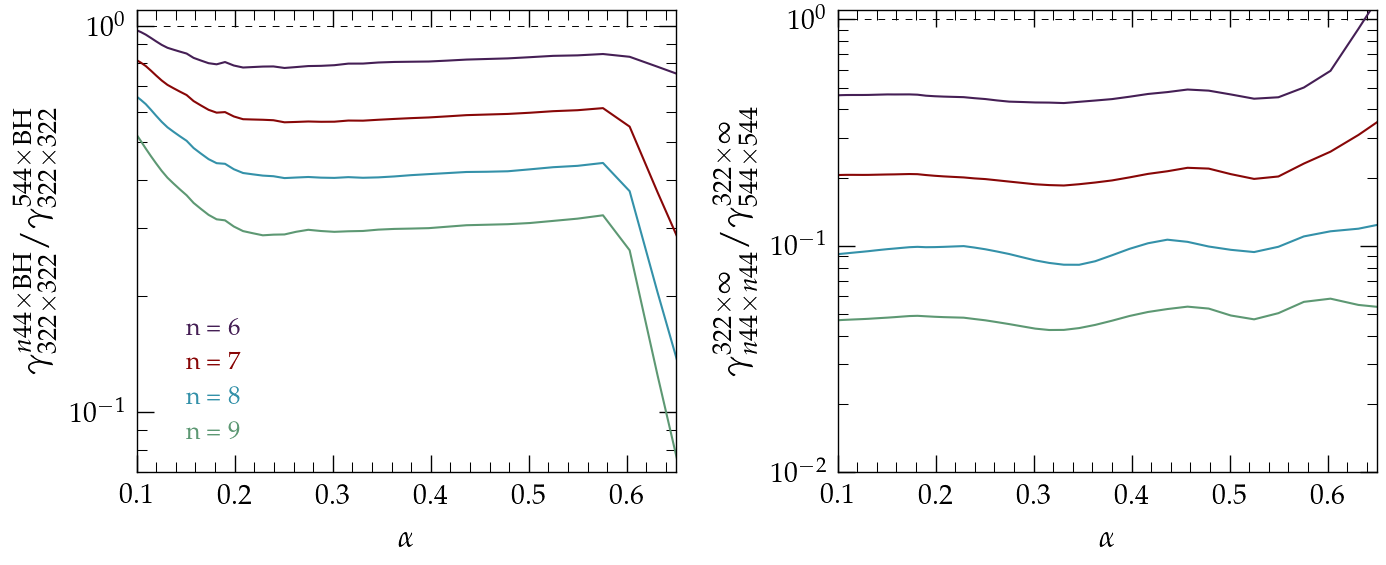

In [117]:

fig, axs = plt.subplots(1,2, figsize=(16,6))
lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3)


alphaV = np.logspace(np.log10(0.03), np.log10(finalA), 70)

axs[0].plot(alphaV, 10 ** g336I(np.log10(alphaV)) / 10 ** g335I(np.log10(alphaV)), c=colorL[0], lw=lw)
axs[0].plot(alphaV, 10 ** g337I(np.log10(alphaV)) / 10 ** g335I(np.log10(alphaV)), c=colorL[1], lw=lw)
axs[0].plot(alphaV, 10 ** g338I(np.log10(alphaV)) / 10 ** g335I(np.log10(alphaV)), c=colorL[2], lw=lw)
axs[0].plot(alphaV, 10 ** g339I(np.log10(alphaV)) / 10 ** g335I(np.log10(alphaV)), c=colorL[3], lw=lw)



axs[1].plot(alphaV, 10 ** g663I(np.log10(alphaV)) / 10 ** g533I(np.log10(alphaV)), c=colorL[0], lw=lw)
axs[1].plot(alphaV, 10 ** g773I(np.log10(alphaV)) / 10 ** g533I(np.log10(alphaV)), c=colorL[1], lw=lw)
axs[1].plot(alphaV, 10 ** g883I(np.log10(alphaV)) / 10 ** g533I(np.log10(alphaV)), c=colorL[2], lw=lw)
axs[1].plot(alphaV, 10 ** g993I(np.log10(alphaV)) / 10 ** g533I(np.log10(alphaV)), c=colorL[3], lw=lw)

axs[0].set_xlabel(r"$\alpha$", fontsize=22)
axs[1].set_xlabel(r"$\alpha$", fontsize=22)
axs[0].set_ylabel(r"$\gamma_{322 \times 322}^{n44 \times {\rm BH}} / \gamma_{322 \times 322}^{544 \times {\rm BH}}$", fontsize=25)
axs[1].set_ylabel(r"$\gamma_{n44 \times n44}^{322 \times {\rm \infty}} / \gamma_{544 \times 544}^{322 \times {\rm \infty}}$", fontsize=25)

axs[0].plot([0.03, 1],[1,1], dashes=[7,7], c="k", lw=.7)
axs[1].plot([0.03, 1],[1,1], dashes=[7,7], c="k", lw=.7)
axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].set_xlim([0.1, 0.65])
axs[1].set_xlim([0.1, 0.65])

axs[0].set_ylim([0.07, 1.1])
axs[1].set_ylim([0.01, 1.1])

axs[0].text(0.15, 10**-0.8, r"n = 6", fontsize=18, color=colorL[0])
axs[0].text(0.15, 10**-0.89, r"n = 7", fontsize=18, color=colorL[1])
axs[0].text(0.15, 10**-0.98, r"n = 8", fontsize=18, color=colorL[2])
axs[0].text(0.15, 10**-1.07, r"n = 9", fontsize=18, color=colorL[3])

# plt.tight_layout()
plt.savefig("../plts/n44_rateC.pdf", dpi=200,bbox_inches='tight')

In [62]:
tst2 = np.loadtxt("../test_store/testR.dat")

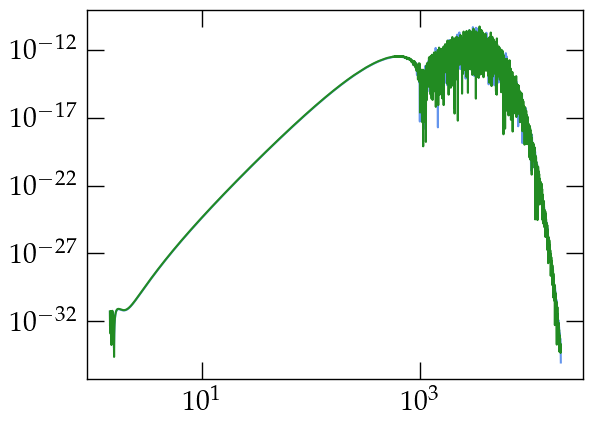

In [63]:


plt.plot(tst[:,0], tst[:,1]**2)
plt.plot(tst2[:,0], tst2[:,1]**2)
plt.yscale("log")
plt.xscale("log")